In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix

cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
latent = pd.read_csv('data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)

In [ ]:
psix_object = psix.Psix()
psix_object.process_rnaseq_solo(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output_NoDedup/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent.index,
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        ) 

Processing STARsolo output. This might take a few minutes...


In [ ]:
psix_object.compute_psix_scores(latent='data/preprocess/tables/pc3_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100)


In [122]:
np.sum((psix_object.psix_results.qvals <= 0.05) & (psix_object.psix_results.psix_score > 0))

617

100%|██████████| 1828/1828 [00:11<00:00, 164.41it/s]


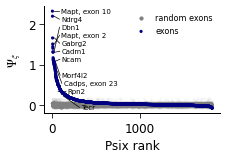

In [11]:
psix_results = psix_object.psix_results.copy()
psix_results['bins'] = ['']*len(psix_results.index)

for mean in psix_object.bins.keys():
    for var in psix_object.bins[mean].keys():
        for exon in psix_object.bins[mean][var]:
            psix_results.loc[exon, 'bins'] = mean +'_' + var
            
fig = plt.figure(figsize=(8*cm, 5*cm))
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons', s=10)

for mean_var in tqdm(psix_results.sort_values('psix_score')[::-1].bins):
    mean = mean_var[:6]
    var = mean_var[7:]
    subset = np.random.choice(psix_object.random_scores[mean][var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02, s=10, edgecolors='none')
    i += 1


plt.text(100, psix_results.loc['Mapt_1'].psix_score-0.05, 'Mapt, exon 10', c='black', fontsize=7)   
ax.plot([20, 80], [psix_results.loc['Mapt_1'].psix_score, psix_results.loc['Mapt_1'].psix_score],c='black', linewidth=0.7)

plt.text(101, psix_results.loc['Mapt_1'].psix_score-0.25, 'Ndrg4', c='black', fontsize=7)   
ax.plot([20, 81], [psix_results.loc['Ndrg4_1'].psix_score, psix_results.loc['Mapt_1'].psix_score-0.2],c='black', linewidth=0.7)

plt.text(102, psix_results.loc['Mapt_1'].psix_score-0.45, 'Dbn1', c='black', fontsize=7)   
ax.plot([20, 82], [psix_results.loc['Dbn1_1'].psix_score, psix_results.loc['Mapt_1'].psix_score-0.4],c='black', linewidth=0.7)

plt.text(103, psix_results.loc['Mapt_1'].psix_score-0.65, 'Mapt, exon 2', c='black', fontsize=7)    
ax.plot([24, 83], [psix_results.loc['Mapt_3'].psix_score, psix_results.loc['Mapt_1'].psix_score-0.6],c='black', linewidth=0.7)

plt.text(104, psix_results.loc['Mapt_1'].psix_score-0.85, 'Gabrg2', c='black', fontsize=7)   
ax.plot([25, 84], [psix_results.loc['Gabrg2_1'].psix_score, psix_results.loc['Mapt_1'].psix_score-0.8],c='black', linewidth=0.7)

plt.text(105, psix_results.loc['Mapt_1'].psix_score-1.05, 'Cadm1', c='black', fontsize=7)    
ax.plot([24, 85], [psix_results.loc['Cadm1_10'].psix_score, psix_results.loc['Mapt_1'].psix_score-1],c='black', linewidth=0.7)

plt.text(106, psix_results.loc['Mapt_1'].psix_score-1.25, 'Ncam', c='black', fontsize=7)   
ax.plot([25, 86], [psix_results.loc['Ncam1_6'].psix_score, psix_results.loc['Mapt_1'].psix_score-1.2],c='black', linewidth=0.7)

# plt.text(107, psix_results.loc['Mapt_1'].psix_score-1.45, 'Dst', c='black', fontsize=7)    
# ax.plot([24, 87], [psix_results.loc['Dst_5'].psix_score, psix_results.loc['Mapt_1'].psix_score-1.4],c='black', linewidth=0.7)

plt.text(109, psix_results.loc['Mapt_1'].psix_score-1.65, 'Morf4l2', c='black', fontsize=7)   
ax.plot([25, 89], [psix_results.loc['Morf4l2_7'].psix_score, psix_results.loc['Mapt_1'].psix_score-1.6],c='black', linewidth=0.7)

plt.text(129, psix_results.loc['Mapt_1'].psix_score-1.85, 'Cadps, exon 23', c='black', fontsize=7)   
ax.plot([55, 109], [psix_results.loc['Cadps_7'].psix_score, psix_results.loc['Mapt_1'].psix_score-1.8],c='black', linewidth=0.7)


plt.text(177, psix_results.loc['Mapt_1'].psix_score-2.05, 'Rpn2', c='black', fontsize=7)   
ax.plot([65, 157], [psix_results.loc['Rpn2_3'].psix_score, psix_results.loc['Mapt_1'].psix_score-2],c='black', linewidth=0.7)

# plt.text(214, psix_results.loc['Mapt_1'].psix_score-2.25, 'Cadps, exon 20', c='black', fontsize=7)   
# ax.plot([105, 194], [psix_results.loc['Cadps_2'].psix_score, psix_results.loc['Mapt_1'].psix_score-2.2],c='black', linewidth=0.7)

plt.text(331, psix_results.loc['Mapt_1'].psix_score-2.45, 'Tecr', c='black', fontsize=7)   
ax.plot([125, 311], [psix_results.loc['Tecr_6'].psix_score, psix_results.loc['Mapt_1'].psix_score-2.4],c='black', linewidth=0.7)

ax.scatter(np.arange(1, len(psix_results.index)+1), psix_results.sort_values('psix_score')[::-1].psix_score, c = 'navy',
          label='exons', s=10, zorder=200, edgecolors='none')
    
plt.xlabel('Psix rank', fontsize=12)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=12)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=12, length=5)
plt.legend(frameon=False, fontsize=8)
plt.show()
# plt.savefig('plots/psix_scores.png', bbox_inches='tight', res=20000, dpi =2000)

Successfully computed neighbors


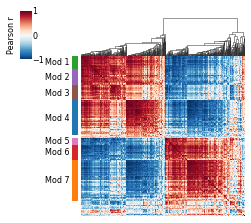

In [123]:
psix_object.compute_neighbors_psi(latent='data/preprocess/tables/pc3_rd.tab.gz', n_neighbors=100)
psix_object.compute_modules()
modules = psix_object.plot_correlation_modules(plot_name = 'plots/exon_modules_alt.png')

In [15]:
latent = pd.read_csv('data/preprocess/tables/p90_rd.tab.gz', sep='\t', index_col=0)

In [124]:
psix_p90 = psix.Psix()
psix_p90.process_rnaseq_solo(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output_NoDedup/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent.index,
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        ) 

psix_p90.compute_psix_scores(latent='data/preprocess/tables/p90_rd.tab.gz', n_jobs=25, 
                                n_random_exons=10000, n_neighbors=20)#, pvals_bins=10)

Processing STARsolo output
Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:52<00:00, 20.24it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 290/290 [00:00<00:00, 22948.67it/s]

Successfully computed cell-cell metric
Computing Psix score in 1813 exons



  0%|          | 0/1813 [2:26:51<?, ?it/s]Process ForkPoolWorker-449:
Process ForkPoolWorker-442:
Process ForkPoolWorker-447:
Process ForkPoolWorker-437:
Process ForkPoolWorker-446:
Process ForkPoolWorker-445:
Process ForkPoolWorker-427:
Process ForkPoolWorker-448:
Process ForkPoolWorker-433:
Process ForkPoolWorker-439:
Process ForkPoolWorker-428:
Process ForkPoolWorker-434:
Process ForkPoolWorker-429:
Process ForkPoolWorker-426:
Process ForkPoolWorker-430:
Process ForkPoolWorker-444:
Process ForkPoolWorker-440:
Process ForkPoolWorker-438:
Process ForkPoolWorker-450:
Process ForkPoolWorker-435:
Process ForkPoolWorker-443:
Process ForkPoolWorker-436:
Process ForkPoolWorker-431:
Process ForkPoolWorker-432:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Trace

  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/mnt/lareaulab/cfb

KeyboardInterrupt: 

In [ ]:
np.sum((psix_p90.psix_results.qvals <= 0.05) & (psix_p90.psix_results.psix_score > 0))

In [ ]:
psix_p90.compute_neighbors_psi(latent='data/preprocess/tables/p90_rd.tab.gz', n_neighbors=30)
psix_p90.compute_modules()
modules = psix_p90.plot_correlation_modules(plot_name = 'plots/exon_modules_P90_alt.png')

In [ ]:
latent_p90 = latent
latent_p1 = pd.read_csv('data/preprocess/tables/p1_rd.tab.gz', sep='\t', index_col=0)
psix_p1 = psix.Psix()
psix_p1.process_rnaseq_solo(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent_p1.index,
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz'
)

psix_p1.compute_psix_scores(latent='data/preprocess/tables/p1_rd.tab.gz', n_jobs=25, 
                                n_random_exons=10000, n_neighbors=30)#, pvals_bins=10)

In [ ]:
latent_e13 = pd.read_csv('data/preprocess/tables/e13_rd.tab.gz', sep='\t', index_col=0)
psix_e13 = psix.Psix()
psix_e13.process_rnaseq_solo(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent_e13.index,
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz'
)

psix_e13.compute_psix_scores(latent='data/preprocess/tables/e13_rd.tab.gz', n_jobs=25, 
                                n_random_exons=10000, n_neighbors=30)#, pvals_bins=10)

In [60]:
sig_exons_p90 = psix_p90.psix_results.loc[((psix_p90.psix_results.qvals <= 0.05) & (psix_p90.psix_results.psix_score > 0))].index
sig_exons_p1 = psix_p1.psix_results.loc[((psix_p1.psix_results.qvals <= 0.05) & (psix_p1.psix_results.psix_score > 0))].index
sig_exons_e13 = psix_e13.psix_results.loc[((psix_e13.psix_results.qvals <= 0.05) & (psix_e13.psix_results.psix_score > 0))].index

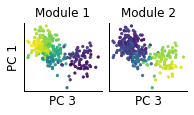

In [68]:
from itertools import product
from matplotlib.gridspec import GridSpec
from scipy.stats import zscore
p90_cells = latent_p90.index

fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 2].index],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

# plt.savefig('plots/p90_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [83]:
mmin1 = np.nanmin(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index], axis=1, nan_policy='omit').mean(axis=0))
mmax1 = np.nanmax(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index], axis=1, nan_policy='omit').mean(axis=0))
mmin2 = np.nanmin(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 2].index], axis=1, nan_policy='omit').mean(axis=0))
mmax2 = np.nanmax(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 2].index], axis=1, nan_policy='omit').mean(axis=0))

In [82]:
np.nanmin(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index], axis=1, nan_policy='omit').mean(axis=0))

-1.3707078546103757

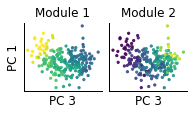

In [84]:
from itertools import product
from matplotlib.gridspec import GridSpec
from scipy.stats import zscore
p90_cells = latent_p1.index

fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent_p1.loc[p90_cells].PC_3, latent_p1.loc[p90_cells].PC_1,
           c = zscore(psix_p1.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index & psix_p1.adata.uns['neighbors_psi'].columns],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9, vmin=mmin1, vmax=mmax1)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent_p1.loc[p90_cells].PC_3, latent_p1.loc[p90_cells].PC_1,
           c = zscore(psix_p1.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 2].index & psix_p1.adata.uns['neighbors_psi'].columns],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9, vmin=mmin2, vmax=mmax2)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

# plt.savefig('plots/p90_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

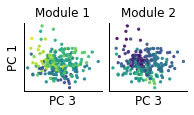

In [85]:
from itertools import product
from matplotlib.gridspec import GridSpec
from scipy.stats import zscore
p90_cells = latent_e13.index

fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent_e13.loc[p90_cells].PC_3, latent_e13.loc[p90_cells].PC_1,
           c = zscore(psix_e13.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 1].index & psix_e13.adata.uns['neighbors_psi'].columns],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9, vmin=mmin1, vmax=mmax1)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent_e13.loc[p90_cells].PC_3, latent_e13.loc[p90_cells].PC_1,
           c = zscore(psix_e13.adata.uns['neighbors_psi'].T.loc[psix_p90.modules.loc[psix_p90.modules == 2].index & psix_e13.adata.uns['neighbors_psi'].columns],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9, vmin=mmin2, vmax=mmax2)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

# plt.savefig('plots/p90_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [70]:
psix_p1.compute_neighbors_psi(latent='data/preprocess/tables/p1_rd.tab.gz', n_neighbors=30)

Successfully computed neighbors


In [71]:
psix_e13.compute_neighbors_psi(latent='data/preprocess/tables/e13_rd.tab.gz', n_neighbors=30)

Successfully computed neighbors


In [88]:
def get_all_exons_neighbors(psi, cell_metric):
    
    neighbors_psi = []
    
    for exon_psi in psi.T:
        neighbors_psi.append(get_exon_neighbors_psi(exon_psi, cell_metric))
        
    return np.array(neighbors_psi)


def get_background(psi, metric):
#     psi = np.array(self.adata.uns['psi'])
    
    neighbors_psi = pd.DataFrame(get_all_exons_neighbors(np.array(psi), metric),
                                 columns = psi.index,
                                 index = psi.columns)
    return neighbors_psi



import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm 
from numba import jit

def compute_cell_metric_light(
    manifold, 
    n_neighbors=100, 
    weight_metric = True,
):
    
    
    cells = manifold.index
    n_cells = len(cells)
    
    knn_neighbors = NearestNeighbors(n_neighbors=n_neighbors+1).fit(manifold)
    distances, indices = knn_neighbors.kneighbors(manifold)
    
    
    
    neighbor_indices = pd.DataFrame(indices, index=cells)
    
    weights = np.ones((len(cells), (n_neighbors+1)))
    
    for i in tqdm(range(len(manifold.index)), position=0, leave=True):
        sigma = np.max(distances[i])
        for j in range(1, len(distances[i])):
            d = distances[i][j]
            w = compute_weight(d, sigma)
            weights[i, j] = w
        
    cell_metric = (indices, weights)
    return cell_metric


@jit(nopython=True)
def compute_weight(d, sigma):
    return np.exp(-(d**2)/(sigma**2)) 


@jit(nopython=True)
def get_exon_neighbors_psi(observed_psi_array, cell_metric):
    psi_a_array = []
    for i in range(len(observed_psi_array)):
#         psi_o = observed_psi_array[i]
                    
#         psi_o_array.append(psi_o)

        neighbors = cell_metric[0][i]
        weights = cell_metric[1][i]

        psi_sum = 0
        weight_sum = 0
        for j in range(len(neighbors)):
            psi_n = observed_psi_array[neighbors[j]]
            if not np.isnan(psi_n):
                psi_sum += (psi_n * weights[j])
                weight_sum += weights[j]
        if weight_sum > 0:
            psi_a_array.append(psi_sum/weight_sum)
        else:
            psi_a_array.append(np.nan)
                
    return psi_a_array

In [90]:
latent = pd.read_csv('data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)
p90_cells = latent_p90.index
p1_cells = latent_p1.index
e13_cells = latent_e13.index

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p90_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p90 = get_background(psix_object.adata.uns['psi'].loc[p90_cells], cell_metric)
neighbors_psi_p90_z = pd.DataFrame(zscore(neighbors_psi_p90, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p90.columns,
                                   index = neighbors_psi_p90.index).fillna(0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p1_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p1 = get_background(psix_object.adata.uns['psi'].loc[p1_cells], cell_metric)
neighbors_psi_p1_z = pd.DataFrame(zscore(neighbors_psi_p1, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p1.columns,
                                   index = neighbors_psi_p1.index).fillna(0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[e13_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_e13 = get_background(psix_object.adata.uns['psi'].loc[e13_cells], cell_metric)
neighbors_psi_e13_z = pd.DataFrame(zscore(neighbors_psi_e13, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_e13.columns,
                                   index = neighbors_psi_e13.index).fillna(0)

100%|██████████| 240/240 [00:00<00:00, 19100.47it/s]


In [94]:
sig_exons_p90 = psix_p90.psix_results.loc[((psix_p90.psix_results.qvals <= 0.05) & (psix_p90.psix_results.psix_score > 0))].index

remaining = pd.Index(sig_exons_p90) & psix_object.adata.uns['psi'].columns
neighbors_psi_p90_z.loc[remaining]

from sklearn.decomposition import PCA

pc = PCA().fit(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0))

In [95]:
from scipy.stats import pearsonr, spearmanr
norm_expression = pd.read_csv('data/preprocess/tables/scone_norm_tpm_extended.tab.gz', sep='\t', index_col=0)[latent.index]
RBP_cannonical_list = ['Ptbp1', 'Ptbp2', 'Mbnl1', 'Mbnl2','Nova1', 'Nova2', 'Rbfox1', 'Rbfox2', 'Rbfox3',
                      'U2af2', 'Fus', 'Cirbp', 'Celf4', 'Tardbp', 'Srsf7']

# RBP_cannonical_list = ['Ptbp1', 'Ptbp2', 'Mbnl1', 'Mbnl2','Nova1', 'Nova2', 'Rbfox1', 'Rbfox2', 'Rbfox3']
correlation = pd.DataFrame(np.zeros((3, len(RBP_cannonical_list))), index = ['E13', 'P1', 'P90'],
                          columns = RBP_cannonical_list)

correlation_sig = pd.DataFrame(np.zeros((3, len(RBP_cannonical_list))), index = ['E13', 'P1', 'P90'],
                          columns = RBP_cannonical_list)


for RBP in RBP_cannonical_list:
    e13_cor = pearsonr(pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, e13_cells])
    
    correlation.loc['E13', RBP] = e13_cor[0]
    correlation_sig.loc['E13', RBP] = e13_cor[1]
    
    p1_cor = pearsonr(pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, p1_cells])
    
    correlation.loc['P1', RBP] = p1_cor[0]
    correlation_sig.loc['P1', RBP] = p1_cor[1]
    
    p90_cor = pearsonr(pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, p90_cells])
    
    correlation.loc['P90', RBP] = p90_cor[0]
    correlation_sig.loc['P90', RBP] = p90_cor[1]

In [97]:
from statsmodels.stats.multitest import multipletests

correlation_sig_fdr = pd.DataFrame(multipletests(np.array(correlation_sig).reshape(1,-1)[0], 
                                                       method='fdr_bh')[1].reshape(correlation_sig.shape),#<=0.1,
                                        columns = correlation_sig.columns, index = correlation_sig.index)

In [99]:
labels = (correlation_sig_fdr[RBP_cannonical_list] <= 0.05).T

for c in labels.columns:
    for i in labels.index:
        if labels.loc[i, c]:
            labels.loc[i,c] = '*'
        else:
            labels.loc[i,c] = ''

In [103]:
labels

,E13,P1,P90
Ptbp1,,,
Ptbp2,,,*
Mbnl1,,,
Mbnl2,*,,*
Nova1,,*,*
Nova2,,,
Rbfox1,,*,*
Rbfox2,,,
Rbfox3,,,
U2af2,,,


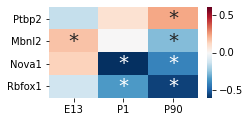

In [113]:
import seaborn as sns
fig = plt.figure(figsize=(8/2.4, 4/2.4))
ax = sns.heatmap(correlation[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']].T, cmap='RdBu_r', vmax=0.6, vmin=-0.6, 
                 annot=labels.loc[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']], fmt='', annot_kws ={"size":20})



plt.yticks(rotation=0) 

plt.show()

In [112]:
correlation[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']].T

,E13,P1,P90
Ptbp2,-0.143411,0.089752,0.231044
Mbnl2,0.174372,0.002373,-0.260009
Nova1,0.139585,-0.597425,-0.402209
Rbfox1,-0.117772,-0.346811,-0.560186


In [40]:
exon_list = open('/mnt/lareaulab/cfbuenabadn/Network/Mouse/SplicingNetwork/psix_events/exons_list.txt', 'r').readlines()
exon_list = [x.rstrip() for x in exon_list]

In [49]:
exon_list = sorted(pd.Index(exon_list) | psix_object.psix_results.index | psix_p90.psix_results.index)

In [51]:
fh = open('/mnt/lareaulab/cfbuenabadn/Network/Mouse/SplicingNetwork/psix_events/exons_list.txt', 'w')
for exon in exon_list:
    fh.write(exon + '\n')
fh.close()

In [56]:
17904/4

4476.0

In [57]:
len(exon_list)

4623

In [3]:
from rnaseq_tools import *

In [4]:
intron_mtx_CI, intron_mtx_exons = process_solo('/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent.index)

Reading solo splice junctions
getting barcodes
getting matrix


In [5]:
psi, reads = get_psi_table_solo(intron_mtx_exons, 1, 1, tenX=False)

alt_exons = psi.index[np.abs(0.5 - psi.mean(axis=1)) <= (0.5-0.05)]
obs_exons = psi.index[psi.isna().mean(axis=1) <= 1-0.25]
selected_exons = alt_exons & obs_exons

psi = psi.loc[selected_exons]
reads = reads.loc[selected_exons]

getting psi table


In [6]:
mrna = tpm_to_mrna2('data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz')
##### New thing
cells = psi.columns & mrna.columns
mrna = mrna[cells]
psi = psi[cells]



100%|██████████| 1067/1067 [00:51<00:00, 20.65it/s]


In [7]:
constitutive_sj = intron_mtx_CI
obs_mrna = mrna.index[mrna.median(axis=1) >= 1]
obs_junctions = [x for x in constitutive_sj.index if x.split('_')[0] in obs_mrna]

mrna_per_junction = mrna.loc[[x.split('_')[0] for x in obs_junctions]]
mrna_per_junction.index = obs_junctions

# reads_per_junction = (constitutive_sj.loc[obs_junctions] / mrna_per_junction).replace([np.inf, -np.inf], np.nan)
# SJ_mean = reads_per_junction.mean()

# mrna_events = (reads/(SJ_mean * (1+psi)))

In [8]:
pd.DataFrame((constitutive_sj.loc[obs_junctions] / mrna_per_junction)).sparse.to_dense().replace([np.inf, -np.inf], np.nan)

,SRR7408400,SRR7408401,SRR7408404,SRR7408413,SRR7408414,SRR7408418,SRR7408422,SRR7408424,SRR7408426,SRR7408427,...,SRR7410086,SRR7410088,SRR7410089,SRR7410090,SRR7410091,SRR7410092,SRR7410093,SRR7410094,SRR7410096,SRR7410097
AI413582_2_CI,0.362579,NaN,0.000000,NaN,NaN,0.000000,2.087783,0.234490,NaN,0.000000,...,0.871545,0.448128,0.534069,0.790749,0.684936,0.430942,0.000000,0.546462,1.169490,1.780465
AI413582_3_CI,0.000000,NaN,0.000000,NaN,NaN,0.000000,1.193019,0.234490,NaN,0.000000,...,0.697236,0.627380,0.631172,1.581498,2.054807,0.603319,0.795564,0.765046,0.000000,1.271761
Aacs_11_CI,0.000000,NaN,0.000000,0.000000,0.655525,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,2.579818,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
Aacs_12_CI,0.000000,NaN,0.000000,0.000000,1.311051,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,0.746690,NaN,NaN,0.000000,0.000000,1.569440,NaN
Aacs_4_CI,0.000000,NaN,1.915603,0.000000,0.327763,0.758990,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,5.159636,0.000000,NaN,NaN,0.000000,1.061674,1.569440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pdha1_5_CI,0.749789,0.214148,0.000000,NaN,NaN,0.000000,2.945025,0.000000,NaN,NaN,...,0.000000,0.000000,1.093044,0.191307,0.796661,0.590546,0.000000,0.751772,0.393285,0.819748
Pdha1_6_CI,0.000000,0.642445,0.000000,NaN,NaN,0.390309,0.981675,0.000000,NaN,NaN,...,0.000000,0.000000,0.136630,0.127538,0.477997,0.590546,0.401086,0.125295,0.393285,0.655799
Pdha1_7_CI,0.374895,0.856594,0.000000,NaN,NaN,0.130103,2.945025,0.000000,NaN,NaN,...,0.000000,0.000000,0.136630,0.255076,0.637329,0.236219,0.401086,0.626476,0.393285,0.819748
Pdha1_10_CI,0.374895,0.428297,0.000000,NaN,NaN,0.260206,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.273261,0.255076,0.238998,0.590546,0.401086,0.375886,0.131095,0.983698


In [26]:
mrna_per_event = get_mrna_per_event(mrna, psi, reads, intron_mtx_CI) #constitutive_sj_file)

['AI413582_2_CI',
 'AI413582_3_CI',
 'Aacs_11_CI',
 'Aacs_12_CI',
 'Aacs_4_CI',
 'Aacs_5_CI',
 'Aagab_5_CI',
 'Aagab_6_CI',
 'Aagab_4_CI',
 'Aagab_7_CI',
 'Aarsd1_2_CI',
 'Aarsd1_4_CI',
 'Aarsd1_11_CI',
 'Abcc5_3_CI',
 'Abcd3_16_CI',
 'Abcd3_17_CI',
 'Abce1_2_CI',
 'Abce1_3_CI',
 'Abce1_10_CI',
 'Abce1_11_CI',
 'Abcf1_4_CI',
 'Abcf2_4_CI',
 'Abcf2_5_CI',
 'Abcf3_3_CI',
 'Abcf3_4_CI',
 'Abcf3_9_CI',
 'Abcf3_10_CI',
 'Abhd12_3_CI',
 'Abhd12_4_CI',
 'Abhd12_7_CI',
 'Abhd12_8_CI',
 'Abhd12_12_CI',
 'Abhd14a_1_CI',
 'Abhd16a_10_CI',
 'Abhd16a_11_CI',
 'Abhd16a_3_CI',
 'Abhd8_3_CI',
 'Abhd8_4_CI',
 'Abi1_3_CI',
 'Abi1_4_CI',
 'Acaa1a_1_CI',
 'Acadm_3_CI',
 'Acat1_2_CI',
 'Acat1_3_CI',
 'Acat1_6_CI',
 'Acat1_7_CI',
 'Acat1_10_CI',
 'Acat1_11_CI',
 'Acat1_8_CI',
 'Acat1_9_CI',
 'Acat2_2_CI',
 'Acat2_3_CI',
 'Acd_8_CI',
 'Acd_9_CI',
 'Acd_7_CI',
 'Acd_6_CI',
 'Acd_5_CI',
 'Acly_9_CI',
 'Acly_10_CI',
 'Acly_7_CI',
 'Acly_8_CI',
 'Aco2_2_CI',
 'Aco2_15_CI',
 'Aco2_16_CI',
 'Aco2_7_CI',
 'Aco2_8_C

In [110]:
psix_object = psix.Psix()
psix_object.process_rnaseq_solo(
        '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output/Solo.out/SJ/raw',
        '~/Genomes/pipeline_files/mm10_introns.tab',
        cell_list = latent.index,
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        min_observed = 0.05) 

Processing STARsolo output
Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:48<00:00, 21.97it/s]


Successfully processed RNA-seq data


In [111]:
psix_object.compute_psix_scores(latent='data/preprocess/tables/pc3_rd.tab.gz', n_jobs=25, 
                                n_random_exons=10000, n_neighbors=100)


Computing cell-cell metric...


100%|██████████| 1067/1067 [00:00<00:00, 8376.47it/s]

Successfully computed cell-cell metric
Computing Psix score in 4404 exons



100%|██████████| 4404/4404 [00:35<00:00, 124.53it/s] 


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


 60%|██████    | 15/25 [38:16<25:30, 153.09s/it]  Process ForkPoolWorker-300:
Process ForkPoolWorker-296:
Process ForkPoolWorker-295:
Process ForkPoolWorker-284:
Process ForkPoolWorker-298:
Process ForkPoolWorker-293:
Process ForkPoolWorker-294:
Process ForkPoolWorker-290:
Process ForkPoolWorker-287:
Process ForkPoolWorker-289:
Process ForkPoolWorker-285:
Process ForkPoolWorker-292:
Process ForkPoolWorker-297:
Process ForkPoolWorker-282:
Process ForkPoolWorker-276:
Process ForkPoolWorker-286:
Process ForkPoolWorker-291:
Process ForkPoolWorker-277:
Process ForkPoolWorker-278:
Process ForkPoolWorker-299:
Process ForkPoolWorker-280:
Process ForkPoolWorker-281:
Process ForkPoolWorker-283:
Process ForkPoolWorker-288:
Process ForkPoolWorker-279:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/mnt/larea

  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lar

  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix.py", line 324, in compute_random_exons
    turbo = self.turbo) for exon in r_choice]
KeyboardInterrupt
  File "/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix.py", line 324, in compute_random_exons
    turbo = self.turbo) for exon in r_choice]
KeyboardInterrupt
KeyboardInterrupt
  File "/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix.py", line 324, in compute_random_exons
    turbo = self.turbo) for exon in r_choice]
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter

KeyboardInterrupt: 

In [109]:
psix_results.to_csv('psix_3D/psix_results_solo.tab.gz', sep='\t', index=True, header=True)